Trabalhando com planilhas do Excel 

In [ ]:
#Importando a biblioteca
import pandas as pd 

In [ ]:

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#juntando todos os arquivos 
df = pd.concat([df1, df2,df3, df4, df5])

In [ ]:
df.head()


,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Akterandi o tipo de dado da
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#consultando valores faltantes 
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#subtituindo valores nulos pela media 
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#apagando as linhas com valores nulos
df.dropna(inplace=True)

Criando colunas novas 

In [ ]:
#Criando a columna de receita 
df["Receita"]= df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Retornando a maior receita 
df["Receita"].max()

3544.0

In [ ]:
df["Receita"].min()

3.34

In [ ]:
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
# agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#ordenando o conjunto de dados 
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


Trabalhando com datas 

In [ ]:
#Transformando a coluna data em tipo inteiro
df["Data"]= df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [ ]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Arupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#criando uma nova coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
202,Salvador,2019-01-02,22.45,1036,1,22.45,2019
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2018
71,Natal,2019-03-20,840.00,854,3,2520.00,2019
44,Natal,2019-01-03,500.00,852,4,2000.00,2019
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019


In [ ]:
#Extraindo mes e o dia 
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
41,Salvador,2019-02-13,9.86,1035,2,19.72,2019,2,13
44,Aracaju,2018-01-01,11.42,1520,5,57.10,2018,1,1
202,Natal,2019-01-02,22.45,1036,1,22.45,2019,1,2
36,Aracaju,2018-01-01,37.99,1523,8,303.92,2018,1,1
86,Recife,2019-01-01,17.83,982,8,142.64,2019,1,1
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2
40,Salvador,2019-02-13,161.87,1036,3,485.61,2019,2,13
117,Aracaju,2018-01-01,170.97,1521,4,683.88,2018,1,1
161,Natal,2019-01-02,5.80,1036,1,5.80,2019,1,2


In [36]:
#calculando diferenca de dias 
df["diferenca_dias"] = df["Data"]- df["Data"].min()

In [38]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias
205,Salvador,2019-01-02,196.09,1037,1,196.09,2019,1,2,366 days
17,Salvador,2019-02-14,158.66,1037,1,158.66,2019,2,14,409 days
105,Aracaju,2018-01-01,24.81,1520,5,124.05,2018,1,1,0 days
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,2018,1,1,0 days
239,Salvador,2019-01-03,161.41,1037,3,484.23,2019,1,3,367 days
76,Aracaju,2018-01-01,33.51,1523,4,134.04,2018,1,1,0 days
193,Salvador,2019-01-02,3.97,1036,2,7.94,2019,1,2,366 days
10,Salvador,2019-01-01,30.97,1036,1,30.97,2019,1,1,365 days
2,Recife,2019-02-10,12.94,983,5,64.70,2019,2,10,405 days
111,Recife,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days


In [39]:
#criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [40]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
128,Recife,2019-03-02,38.70,982,4,154.80,2019,3,2,425 days,1
58,Aracaju,2018-01-01,37.14,1520,7,259.98,2018,1,1,0 days,1
18,Recife,2019-01-01,49.40,980,5,247.00,2019,1,1,365 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,2019,3,2,425 days,1
157,Salvador,2019-01-02,150.17,1036,2,300.34,2019,1,2,366 days,1
157,Natal,2019-01-02,150.17,1036,2,300.34,2019,1,2,366 days,1
83,Recife,2019-01-01,143.61,983,6,861.66,2019,1,1,365 days,1
154,Salvador,2019-01-02,9.58,1037,1,9.58,2019,1,2,366 days,1
196,Salvador,2019-01-02,145.09,1036,2,290.18,2019,1,2,366 days,1
185,Natal,2019-01-02,6.67,1036,1,6.67,2019,1,2,366 days,1


In [42]:
#filtrando as vendas de 2019 do mes de marco 
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month ==3)]

In [43]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


**Visualizacao dados **

In [44]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

In [ ]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

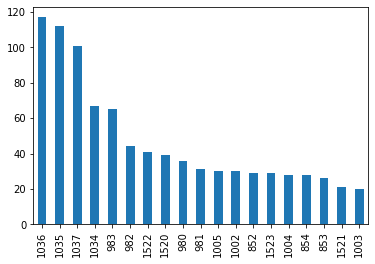

In [45]:
#Grafico de barras 
df['LojaID'].value_counts(ascending=False).plot.bar()

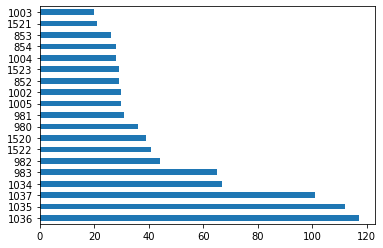

In [47]:
df['LojaID'].value_counts(ascending=False).plot.barh();

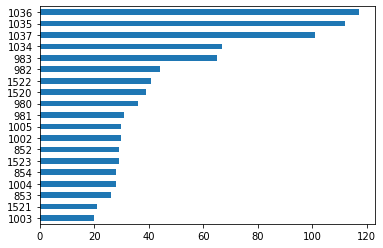

In [48]:
df['LojaID'].value_counts(ascending=True).plot.barh();

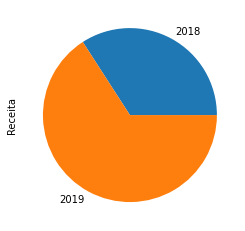

In [50]:
#gRAFICO DE PIZZA 
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [51]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

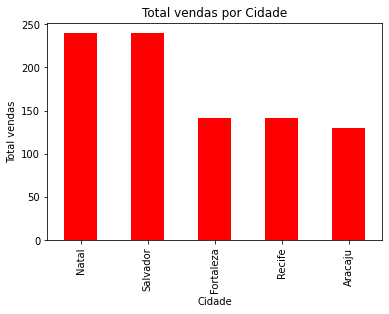

In [52]:
#Adicionando um titulo e alterando o nome dos eixos 
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title ="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [53]:
#arrumando a estilo
plt.style.use("ggplot")


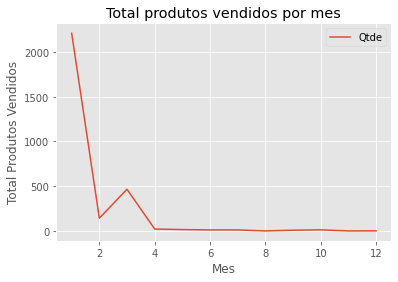

In [55]:
df.groupby(df["mes_venda"]) ["Qtde"].sum().plot(title = "Total produtos vendidos por mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [56]:
df.groupby(df["mes_venda"]) ["Qtde"].sum()


mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [59]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"]== 2019]

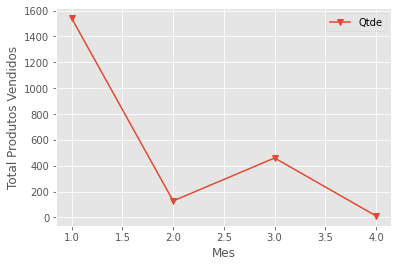

In [60]:
#Total produtos vendidos por mes 
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

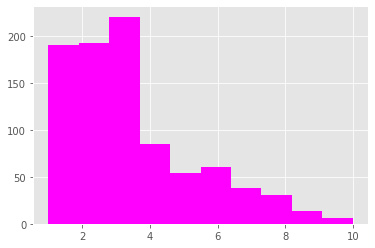

In [62]:
#Histogrma 
plt.hist(df["Qtde"], color ="magenta");


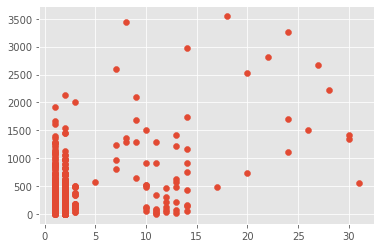

In [63]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

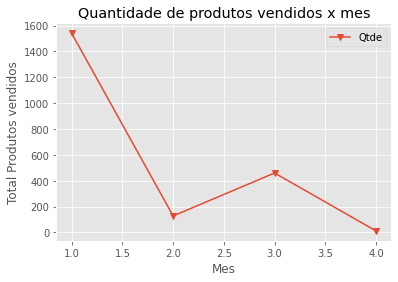

In [64]:
#Salvando png 
df_2019.groupby(df_2019 ["mes_venda"])["Qtde"].sum().plot(marker ="v")
plt.title("Quantidade de produtos vendidos x mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos vendidos");
plt.legend()
plt.savefig("grafico QTDE X MES.png")